# Extrapolation to value at boundary

We will here use Newton polynomial in order to interpolate a value at the boundary without using ghost points.

In [1]:
from IPython.display import display
from dividedDifferences import get_coeff, get_polynomial
from sympy import init_printing
from sympy import symbols, simplify, solve
from sympy import Eq, S, Function

init_printing()

In [2]:
# The values in the points we use for the extrapolation
f0, f1, f2, f3 = symbols('f_0, f_1, f_2, f_3', real=True)
values = [f0, f1, f2, f3]

# Grid spacing 
h = symbols('h', real=True)

# The value at the boundary
fb = symbols('f_b', real=True)

# Variables just for illustrative purposes
x = symbols('x')
# Coefficients in Newton polynomial
a0, a1, a2, a3 = symbols('a_0, a_1, a_2, a_3')
coeffs = [a0, a1, a2, a3]
# The points to extrapolate from (when they are unspecified)
x0, x1, x2, x3 = symbols('x_0, x_1, x_2, x_3')
positions = [x0, x1, x2, x3]

## Intro

We have the following set of points we want to use to build the polynomial

In [3]:
display(positions)

sorted after increasing value of the coordinate $x$. These points takes the following values

In [4]:
display(values)

Our goal is to use these four points to build a Newton polynomial we can use to interpolate the boundary point $x_b$. 

$x_b$ may be the first point in an array of the $x$ coordinates (that is we can order $x$ as $[x_b, x_0, x_1, x_2, x_3 \ldots]$), or it may be the last point (we can order $x$ as $[\ldots, x_0, x_1, x_2, x_3, x_b]$).

In any case:

* Grid points are equally spaced with a gird space $h$ between them.
* The boundary is located $\frac{h}{2}$ between the ghost point and first/last inner grid points.
* $x_0$ serves as the reference point

## The Netwon polynomial

The newton polynomial reads

$$p_N(x) = a_{0} + \sum_{i=1}^{N} a_{i} \prod_{j=0}^{i-1} (x - x_j)$$

our fourth order polynomial thus reads

In [5]:
display(Eq(symbols('p_N')(x), get_polynomial(coeffs, positions, symbols('x'))))

### The coefficients
The coefficients in the Newton polynomial reads

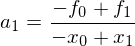

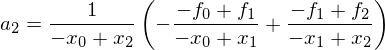

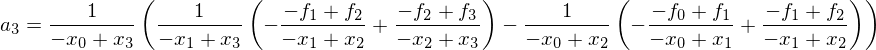

In [6]:
solvedCoeffs = get_coeff(values, positions)
for nr, coeff in enumerate(solvedCoeffs):
    display(Eq(symbols('a_'+str(nr)), coeff))

Inserted in the polynomial yields

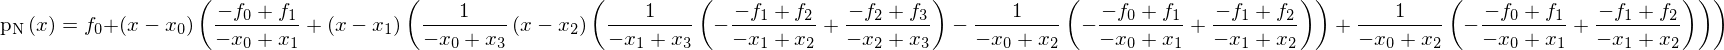

In [7]:
display(Eq(Function('p_N')(x), get_polynomial(solvedCoeffs, positions, x)))

Our points to interpolate from are

In [8]:
# Specification of the points
# Using x_0 as the reference point
x_0 = x0
x_1 = x0 + h
x_2 = x0 + 2*h
x_3 = x0 + 3*h
specifiedPositions = [x_0, x_1, x_2, x_3]
display(specifiedPositions)

## When the boundary is the last in the $x$ array

Evaluating the polynomial in $x_b=x_3+\frac{h}{2}$

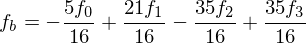

In [9]:
# Specification of the boundary position
x_b = x_3 + h*S(1)/2

# Evaluate the polynomial
p = get_polynomial(get_coeff(values, specifiedPositions), specifiedPositions, x_b)
display(Eq(fb, simplify(p)))

## When the boundary is the first in the $x$ array

Evaluating the polynomial in $x_b=x_0-\frac{h}{2}$

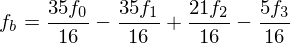

In [10]:
# Specification of the boundary position
x_b = x_0 - h*S(1)/2

# Evaluate the polynomial
p = get_polynomial(get_coeff(values, specifiedPositions), specifiedPositions, x_b)
display(Eq(fb, simplify(p)))